#Clustering for Image Segmentation Lab

## 1. Introduction


### Intro and objectives


### In this lab you will learn:
1. An example of K-Means
### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [11]:
from sklearn.cluster import KMeans


import numpy as np



In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## 2. Load and check data
### 2.1 Let's create some synthetic data

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# extra code – downloads the ladybug image

import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)


### 2.2 Let's observe the data we have

In [8]:
# extra code – this cell generates and saves Figure 9–2

import PIL
import numpy as np

import matplotlib.pyplot as plt

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

Text(0.5, 1.0, 'Original image')

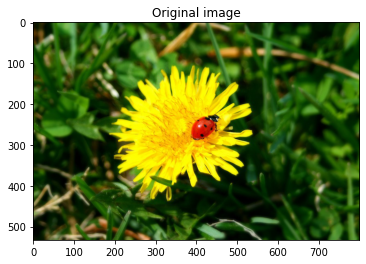

In [9]:
plt.imshow(image)
plt.title("Original image")

The image is represented as a 3D array. The first dimension’s size is the
height; the second is the width; and the third is the number of color
channels, in this case red, green, and blue (RGB). In other words, for each
pixel there is a 3D vector containing the intensities of red, green, and blue
as unsigned 8-bit integers between 0 and 255. Some images may have fewer
channels (such as grayscale images, which only have one), and some
images may have more channels (such as images with an additional alpha
channel for transparency, or satellite images, which often contain channels
for additional light frequencies (like infrared).

## 3. Let's find the optimal number of clusters

In [15]:
# The following code reshapes the array to get a long list of RGB colors
X = image.reshape(-1, 3)


In [14]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

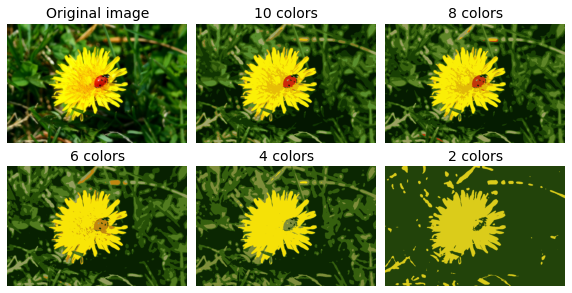

In [19]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

When
you use fewer than eight clusters, notice that the ladybug’s flashy red color
fails to get a cluster of its own: it gets merged with colors from the
environment.

### 3.1 The Elbow method

In [36]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(4, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]



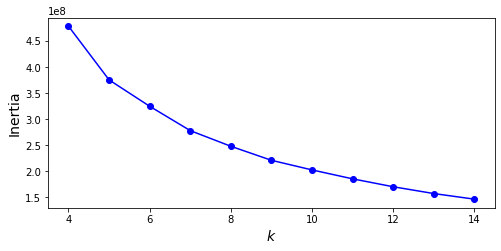

In [38]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(4, 15), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")


plt.show()